In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns       

from scipy import stats
from scipy.stats import  norm
from sklearn.preprocessing import StandardScaler
import warnings
warnings.filterwarnings('ignore')
#%matplotlib inline  

In [2]:
data = pd.read_csv('../save/data_first_addattr_scraped_alldates.csv')

In [3]:
data.columns.values

array(['id', 'host_since', 'latitude', 'longitude', 'accommodates',
       'bathrooms', 'bedrooms', 'beds', 'cleaning_fee', 'guests_included',
       'extra_people', 'availability_30', 'availability_60',
       'availability_90', 'availability_365', 'first_review',
       'last_review', 'minimum_nights', 'maximum_nights',
       'number_of_reviews', 'review_scores_rating', 'no_reviews', 'Adams',
       'Alki', 'Arbor Heights', 'Atlantic', 'Belltown', 'Bitter Lake',
       'Briarcliff', 'Brighton', 'Broadview', 'Broadway', 'Bryant',
       'Cedar Park', 'Central Business District', 'Columbia City',
       'Crown Hill', 'Dunlap', 'East Queen Anne', 'Eastlake',
       'Fairmount Park', 'Fauntleroy', 'First Hill', 'Fremont',
       'Gatewood', 'Genesee', 'Georgetown', 'Green Lake', 'Greenwood',
       'Haller Lake', 'Harrison/Denny-Blaine', 'High Point',
       'Highland Park', 'Holly Park', 'Industrial District', 'Interbay',
       'International District', 'Laurelhurst', 'Lawton Park', '

In [41]:
data['price'].describe()

count    3.651248e+06
mean     1.686035e+02
std      1.548265e+02
min      1.000000e+01
25%      8.500000e+01
50%      1.290000e+02
75%      2.050000e+02
max      1.000000e+04
Name: price, dtype: float64

In [4]:
data_frac = data.sample(frac=0.25).reset_index(drop=True)

In [5]:
data_frac['price'].describe()

count    912812.000000
mean        168.362112
std         150.999109
min          10.000000
25%          85.000000
50%         129.000000
75%         205.000000
max       10000.000000
Name: price, dtype: float64

Skewness: 13.279974
Kurtosis: 653.365855


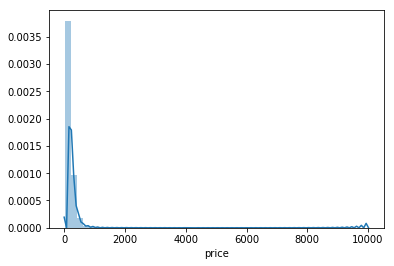

In [6]:
sns.distplot(data_frac['price'])
print("""Skewness: %f
Kurtosis: %f""" % (data_frac['price'].skew(),data_frac['price'].kurt()))

(-0.5, 1.5, 0, 1000)

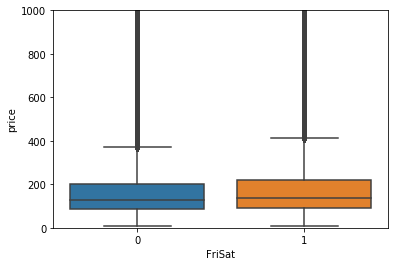

In [7]:
fig = sns.boxplot(x='FriSat',y='price',data=data_frac)
fig.axis(ymin=0,ymax=1000)

(-0.5, 1.5, 0, 2000)

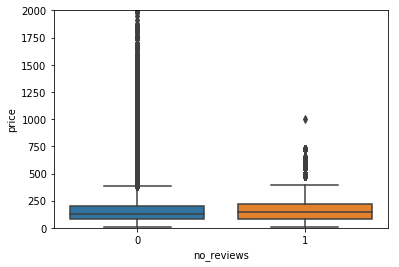

In [9]:
fig = sns.boxplot(x='no_reviews',y='price',data=data_frac)
fig.axis(ymin=0,ymax=2000)

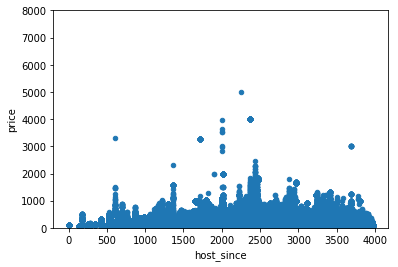

In [16]:
data_frac.plot.scatter(x='host_since',y='price',ylim=(0,8000))

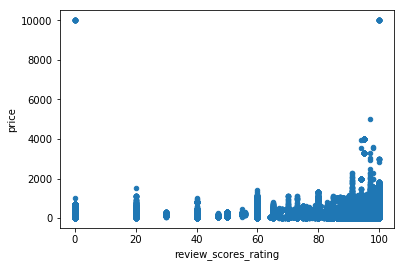

In [17]:
data_frac.plot.scatter(x='review_scores_rating',y='price')

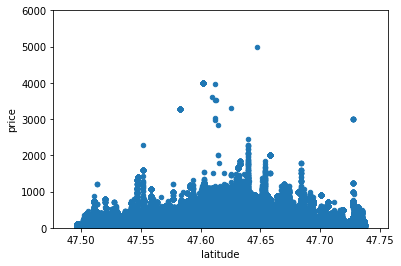

In [19]:
data_frac.plot.scatter(x='latitude',y='price',ylim=(0,6000))

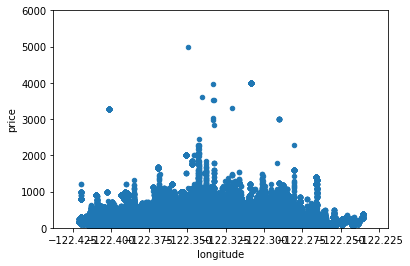

In [20]:
data_frac.plot.scatter(x='longitude',y='price',ylim=(0,6000))

In [24]:
data_frac.columns.values

array(['id', 'host_since', 'latitude', 'longitude', 'accommodates',
       'bathrooms', 'bedrooms', 'beds', 'cleaning_fee', 'guests_included',
       'extra_people', 'availability_30', 'availability_60',
       'availability_90', 'availability_365', 'first_review',
       'last_review', 'minimum_nights', 'maximum_nights',
       'number_of_reviews', 'review_scores_rating', 'no_reviews', 'Adams',
       'Alki', 'Arbor Heights', 'Atlantic', 'Belltown', 'Bitter Lake',
       'Briarcliff', 'Brighton', 'Broadview', 'Broadway', 'Bryant',
       'Cedar Park', 'Central Business District', 'Columbia City',
       'Crown Hill', 'Dunlap', 'East Queen Anne', 'Eastlake',
       'Fairmount Park', 'Fauntleroy', 'First Hill', 'Fremont',
       'Gatewood', 'Genesee', 'Georgetown', 'Green Lake', 'Greenwood',
       'Haller Lake', 'Harrison/Denny-Blaine', 'High Point',
       'Highland Park', 'Holly Park', 'Industrial District', 'Interbay',
       'International District', 'Laurelhurst', 'Lawton Park', '

In [54]:
dataplot1 = data_frac.drop(columns=[ 'id','Adams',
       'Alki', 'Arbor Heights', 'Atlantic', 'Belltown', 'Bitter Lake',
       'Briarcliff', 'Brighton', 'Broadview', 'Broadway', 'Bryant',
       'Cedar Park', 'Central Business District', 'Columbia City',
       'Crown Hill', 'Dunlap', 'East Queen Anne', 'Eastlake',
       'Fairmount Park', 'Fauntleroy', 'First Hill', 'Fremont',
       'Gatewood', 'Genesee', 'Georgetown', 'Green Lake', 'Greenwood',
       'Haller Lake', 'Harrison/Denny-Blaine', 'High Point',
       'Highland Park', 'Holly Park', 'Industrial District', 'Interbay',
       'International District', 'Laurelhurst', 'Lawton Park', 'Leschi',
       'Lower Queen Anne', 'Loyal Heights', 'Madison Park', 'Madrona',
       'Mann', 'Maple Leaf', 'Matthews Beach', 'Meadowbrook',
       'Mid-Beacon Hill', 'Minor', 'Montlake', 'Mount Baker',
       'North Admiral', 'North Beach/Blue Ridge', 'North Beacon Hill',
       'North College Park', 'North Delridge', 'North Queen Anne',
       'Olympic Hills', 'Phinney Ridge', 'Pike-Market', 'Pinehurst',
       'Pioneer Square', 'Portage Bay', 'Rainier Beach', 'Rainier View',
       'Ravenna', 'Riverview', 'Roosevelt', 'Roxhill', 'Seaview',
       'Seward Park', 'South Beacon Hill', 'South Delridge',
       'South Lake Union', 'South Park', 'Southeast Magnolia', 'Stevens',
       'Sunset Hill', 'University District', 'Victory Heights',
       'View Ridge', 'Wallingford', 'Wedgwood', 'West Queen Anne',
       'West Woodland', 'Westlake', 'Whittier Heights', 'Windermere',
       'Yesler Terrace', 'Aparthotel','days_from_scraped', 'FriSat',
       'ChristmasHolidays', 'NewYear', 'MartinLK', 'President',
       'Memorial', 'Independence', 'Labor', 'Columbus', 'Veterans',
       'Thanksgiving', 'Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul',
       'Aug', 'Sep', 'Oct', 'Nov', 'Dec', '2018', '2019','flexible',
       'moderate', 'strict', 'strict_14_with_grace_period',
       'super_strict_30', 'super_strict_60', 'Wifi', 'Essentials',
       'Heating', 'Smoke detector', 'Shampoo', 'Kitchen', 'Hangers',
       'Hair dryer', 'Carbon monoxide detector', 'Washer', 'Dryer',
       'Laptop friendly workspace', 'TV', 'Iron', 'Fire extinguisher',
       'Hot water', 'Self check-in', 'First aid kit',
       'Family/kid friendly', 'Free parking on premises'])

In [55]:
dataplot1.columns.values

array(['host_since', 'latitude', 'longitude', 'accommodates', 'bathrooms',
       'bedrooms', 'beds', 'cleaning_fee', 'guests_included',
       'extra_people', 'availability_30', 'availability_60',
       'availability_90', 'availability_365', 'first_review',
       'last_review', 'minimum_nights', 'maximum_nights',
       'number_of_reviews', 'review_scores_rating', 'no_reviews',
       'Apartment', 'Bed and breakfast', 'Boat', 'Boutique hotel',
       'Bungalow', 'Cabin', 'Camper/RV', 'Castle', 'Condominium',
       'Cottage', 'Guest suite', 'Guesthouse', 'Hostel', 'Hotel', 'House',
       'Houseboat', 'Hut', 'In-law', 'Lighthouse', 'Loft', 'Other',
       'Serviced apartment', 'Tent', 'Tiny house', 'Townhouse',
       'Treehouse', 'Villa', 'Entire home/apt', 'Private room',
       'Shared room', 'Airbed', 'Couch', 'Futon', 'Pull-out Sofa',
       'Real Bed', 'polarity', 'subjectivity', 'price'], dtype=object)

In [56]:
corrdata = dataplot1.corr()

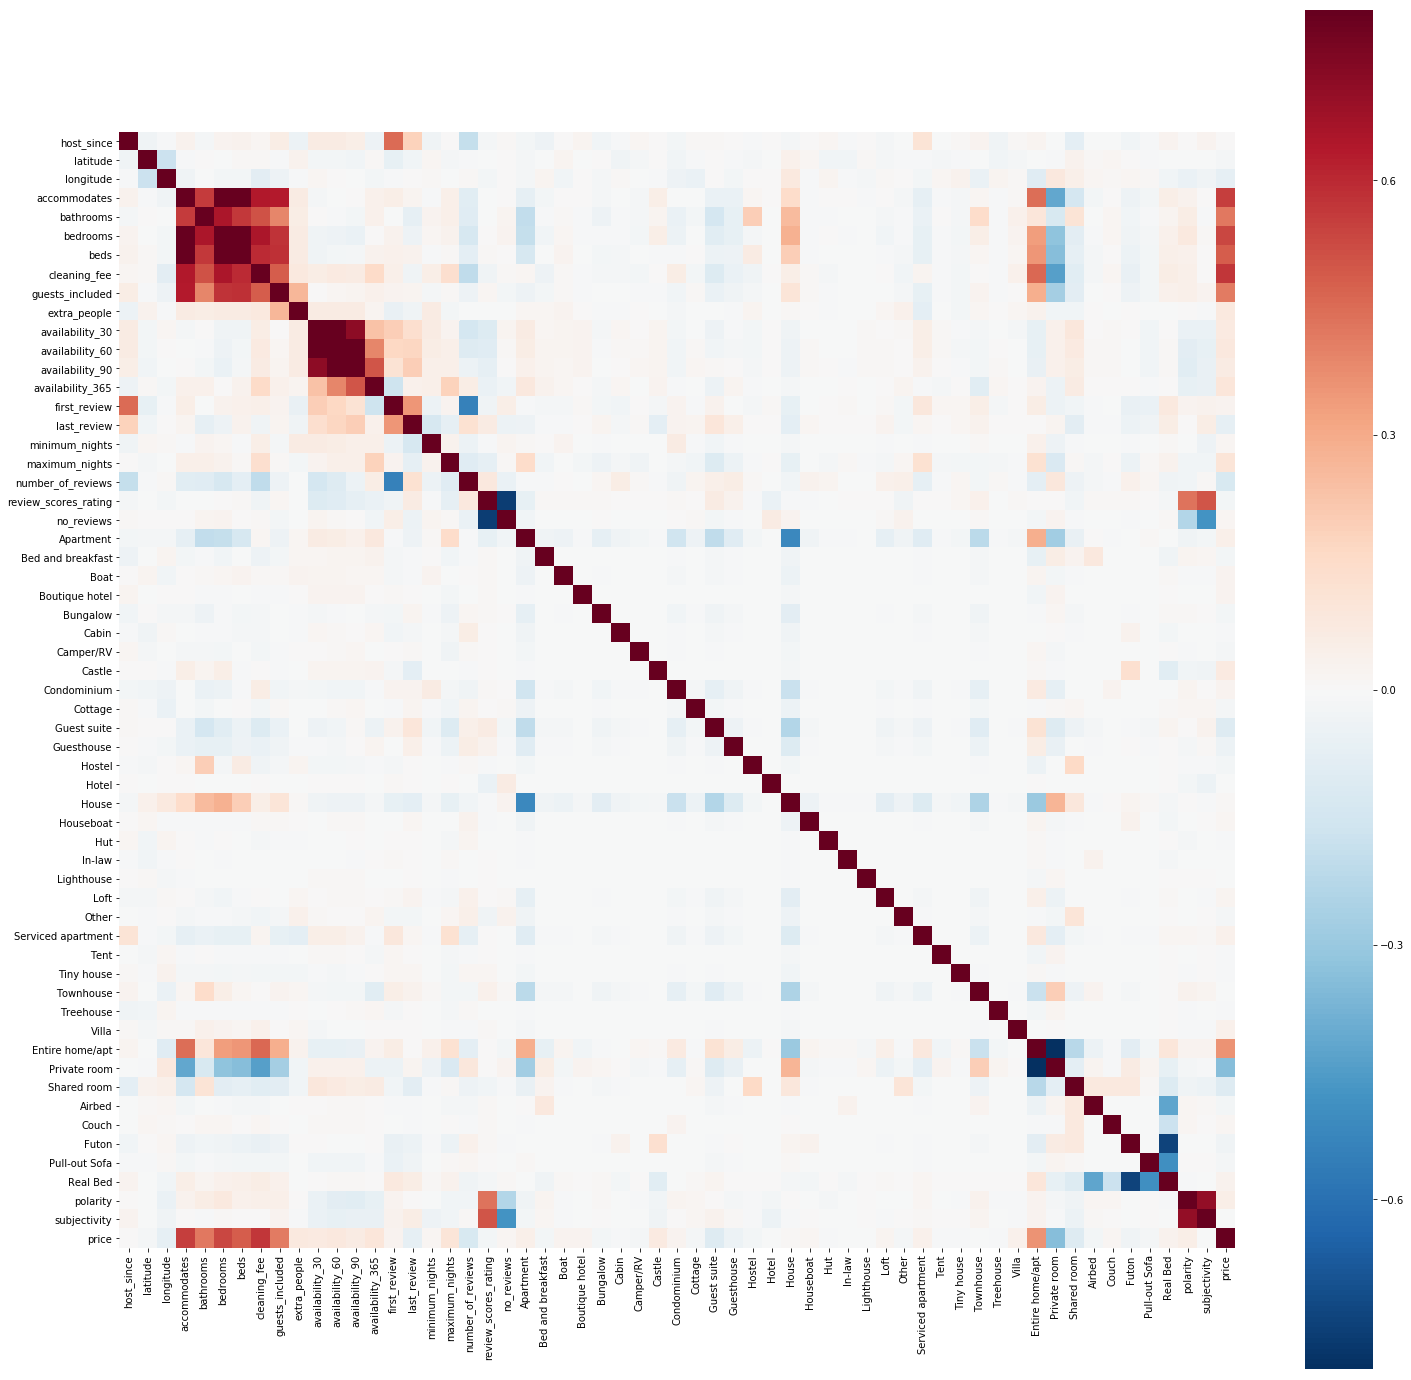

In [57]:
fig, ax = plt.subplots(figsize=(25,25))
sns.heatmap(corrdata,vmax=0.8,vmin=-0.8,square=True,cmap='RdBu_r')

In [58]:
dataplot2 = data_frac[['latitude', 'longitude','Adams',
       'Alki', 'Arbor Heights', 'Atlantic', 'Belltown', 'Bitter Lake',
       'Briarcliff', 'Brighton', 'Broadview', 'Broadway', 'Bryant',
       'Cedar Park', 'Central Business District', 'Columbia City',
       'Crown Hill', 'Dunlap', 'East Queen Anne', 'Eastlake',
       'Fairmount Park', 'Fauntleroy', 'First Hill', 'Fremont',
       'Gatewood', 'Genesee', 'Georgetown', 'Green Lake', 'Greenwood',
       'Haller Lake', 'Harrison/Denny-Blaine', 'High Point',
       'Highland Park', 'Holly Park', 'Industrial District', 'Interbay',
       'International District', 'Laurelhurst', 'Lawton Park', 'Leschi',
       'Lower Queen Anne', 'Loyal Heights', 'Madison Park', 'Madrona',
       'Mann', 'Maple Leaf', 'Matthews Beach', 'Meadowbrook',
       'Mid-Beacon Hill', 'Minor', 'Montlake', 'Mount Baker',
       'North Admiral', 'North Beach/Blue Ridge', 'North Beacon Hill',
       'North College Park', 'North Delridge', 'North Queen Anne',
       'Olympic Hills', 'Phinney Ridge', 'Pike-Market', 'Pinehurst',
       'Pioneer Square', 'Portage Bay', 'Rainier Beach', 'Rainier View',
       'Ravenna', 'Riverview', 'Roosevelt', 'Roxhill', 'Seaview',
       'Seward Park', 'South Beacon Hill', 'South Delridge',
       'South Lake Union', 'South Park', 'Southeast Magnolia', 'Stevens',
       'Sunset Hill', 'University District', 'Victory Heights',
       'View Ridge', 'Wallingford', 'Wedgwood', 'West Queen Anne',
       'West Woodland', 'Westlake', 'Whittier Heights', 'Windermere',
       'Yesler Terrace', 'Aparthotel','price']]

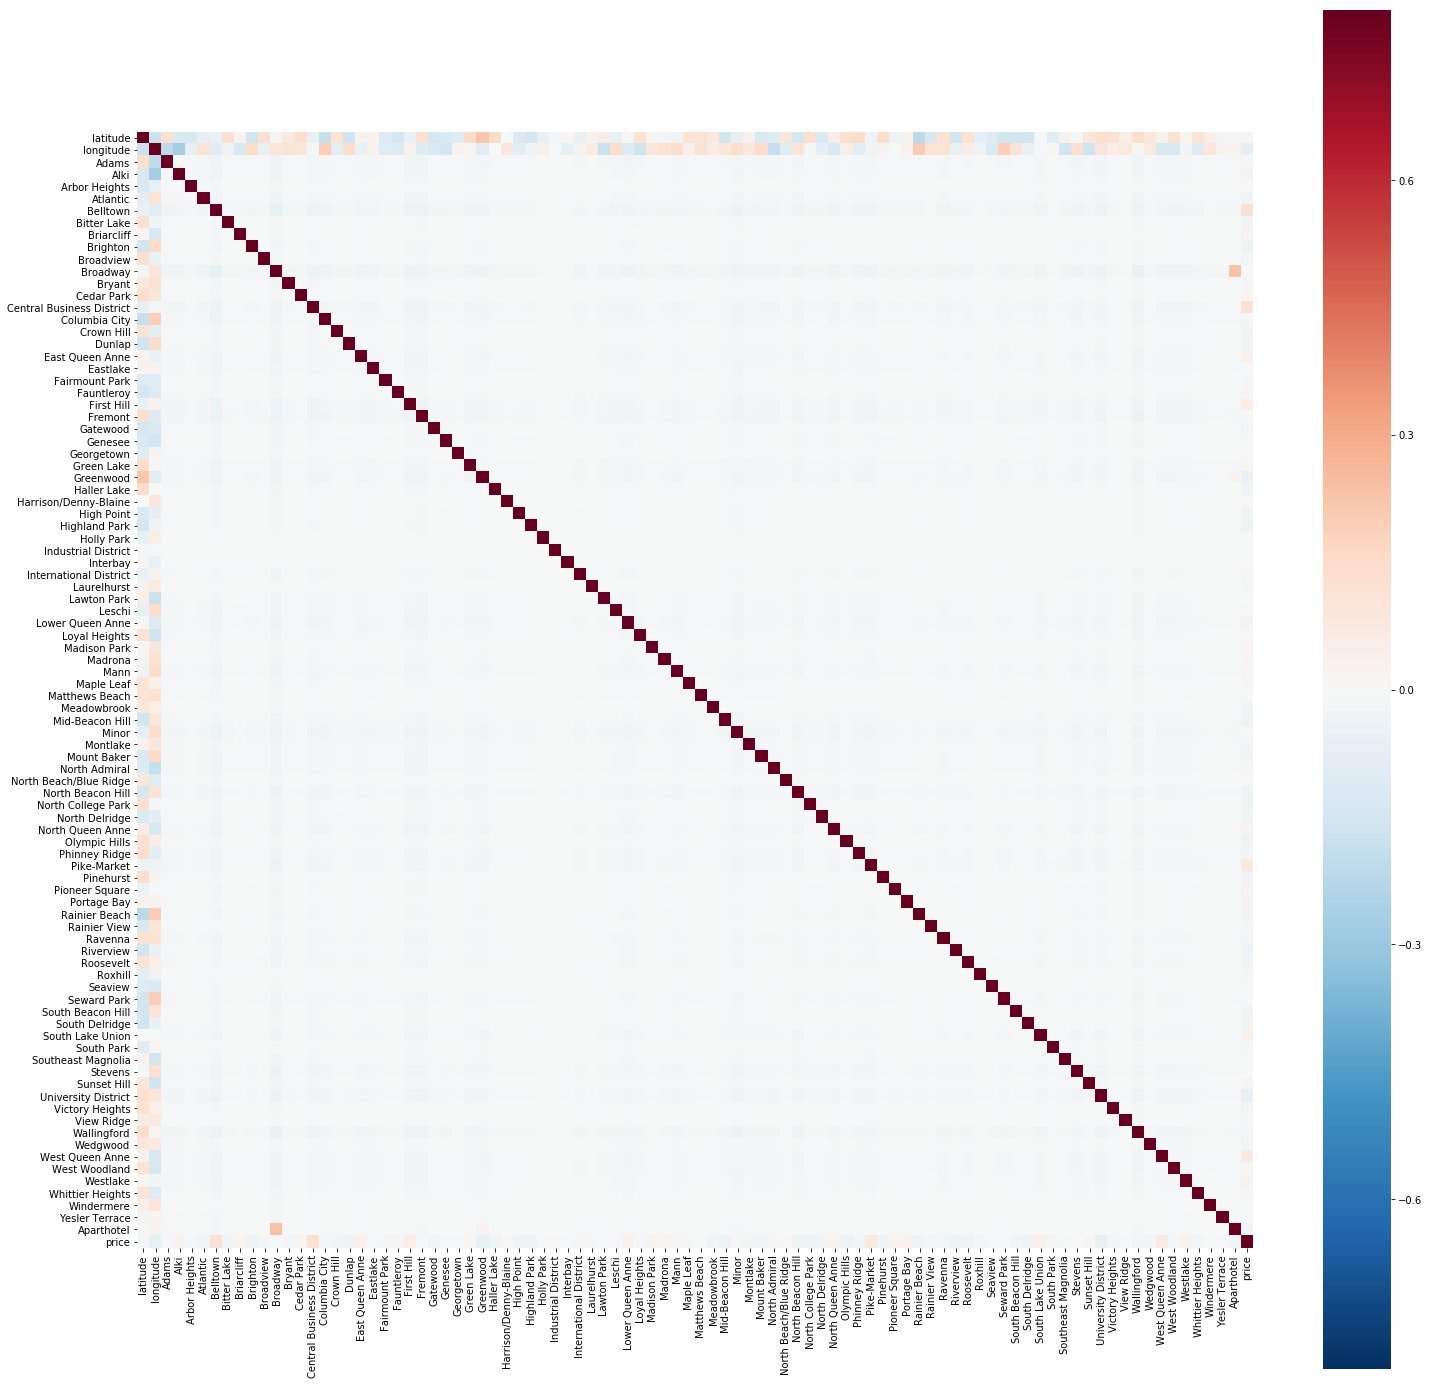

In [60]:
corrdata = dataplot2.corr()
fig, ax = plt.subplots(figsize=(25,25))
sns.heatmap(corrdata,vmax=0.8,vmin=-0.8,square=True,cmap='RdBu_r')

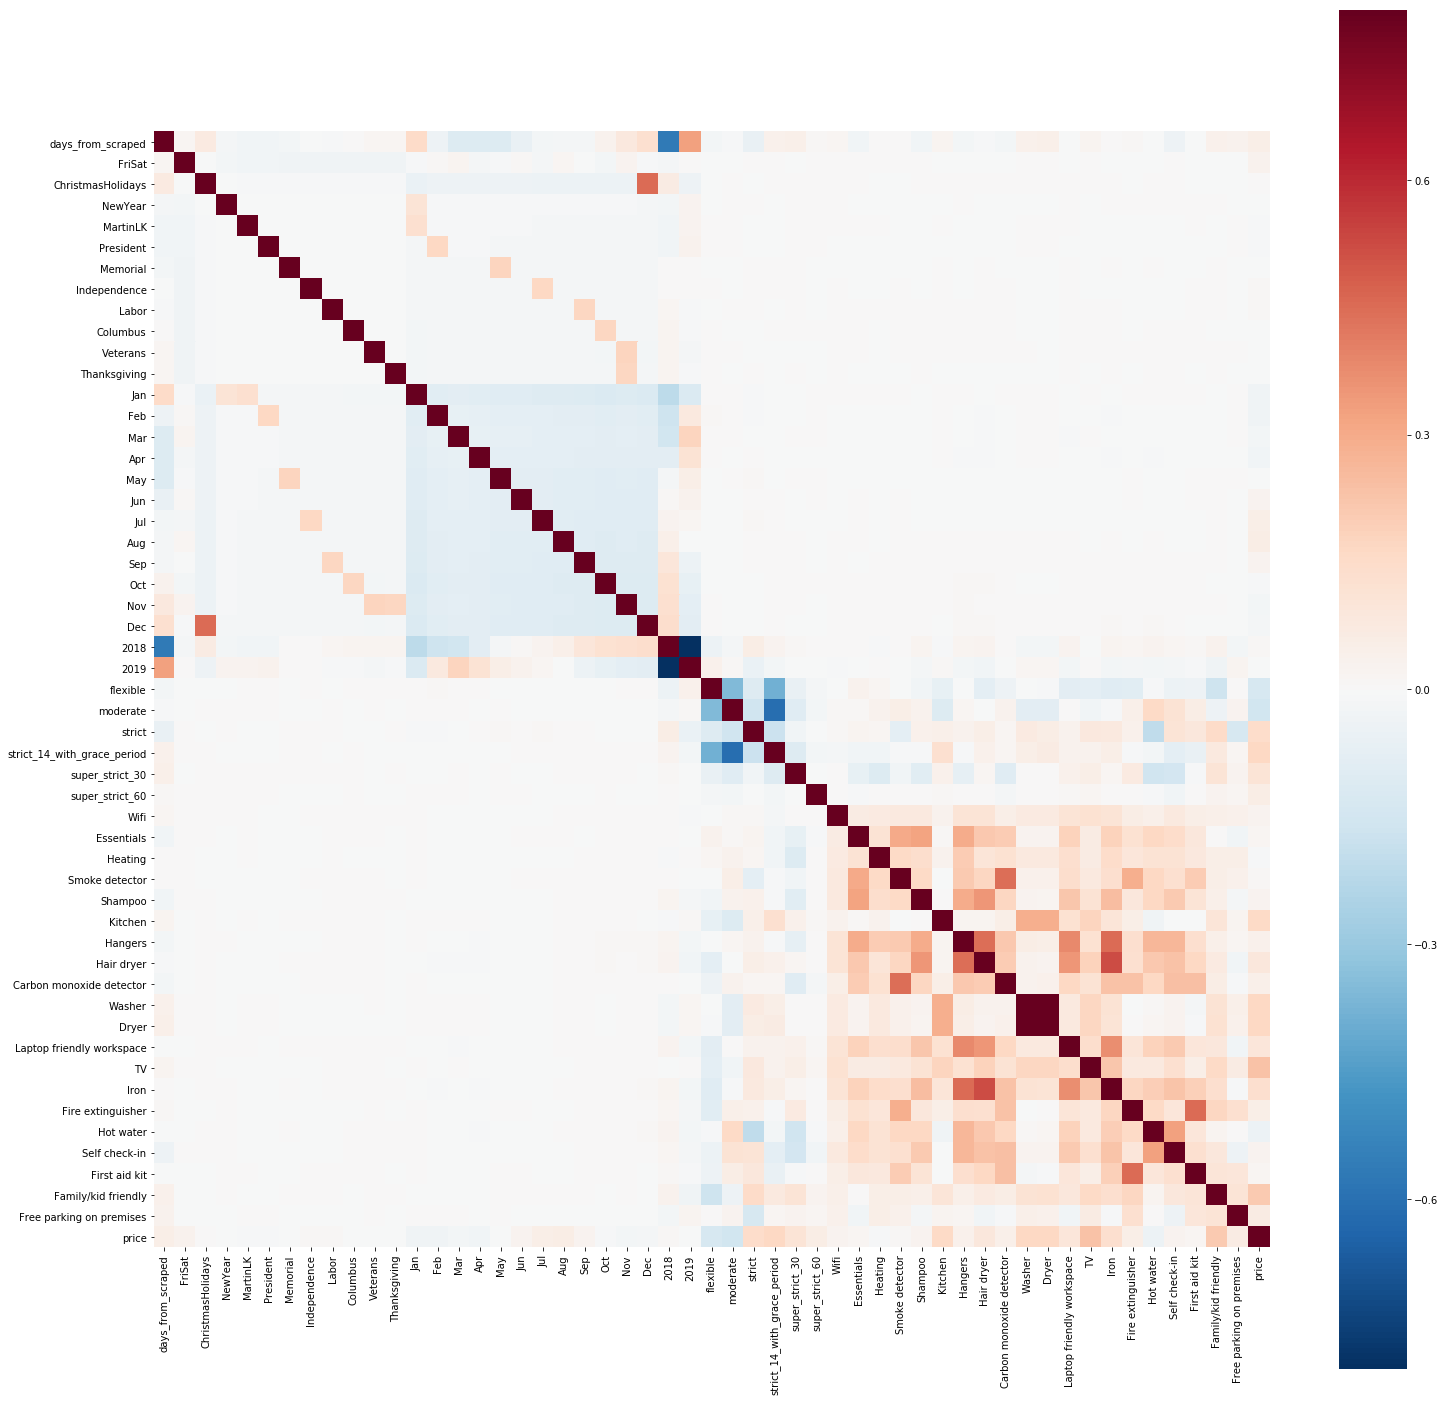

In [62]:
dataplot3 = data_frac[['days_from_scraped', 'FriSat',
       'ChristmasHolidays', 'NewYear', 'MartinLK', 'President',
       'Memorial', 'Independence', 'Labor', 'Columbus', 'Veterans',
       'Thanksgiving', 'Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul',
       'Aug', 'Sep', 'Oct', 'Nov', 'Dec', '2018', '2019','flexible',
       'moderate', 'strict', 'strict_14_with_grace_period',
       'super_strict_30', 'super_strict_60', 'Wifi', 'Essentials',
       'Heating', 'Smoke detector', 'Shampoo', 'Kitchen', 'Hangers',
       'Hair dryer', 'Carbon monoxide detector', 'Washer', 'Dryer',
       'Laptop friendly workspace', 'TV', 'Iron', 'Fire extinguisher',
       'Hot water', 'Self check-in', 'First aid kit',
       'Family/kid friendly', 'Free parking on premises','price']]
corrdata = dataplot3.corr()
fig, ax = plt.subplots(figsize=(25,25))
sns.heatmap(corrdata,vmax=0.8,vmin=-0.8,square=True,cmap='RdBu_r')